# Machine Learning (COSC 522)
## Project 3

## Mount Google Drive Folder (For Google Collab)

In [1]:
# Import Jupyter Widgets
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

In [2]:
# Clone the repository if you're in Google Collab
# from google.colab import drive
# drive.mount('/content/drive', force_remount=False)
def mount_and_change_dir(is_collab: bool = False):
    from google.colab import drive
    # Mount Google Drive
    drive.mount('/content/drive', force_remount=False)
    # Set working directory
    project_path = '/content/drive/MyDrive/Projects/UTK/COSC522'
    os.chdir(project_path)
    print(os.listdir(project_path))
       
print("Are you on Google Collab?")
btn = widgets.Button(description="Yes")
btn.on_click(mount_and_change_dir)
display(btn)

Are you on Google Collab?


Button(description='Yes', style=ButtonStyle())

## Initializations

In [3]:
# Imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_formats = ['png']

import numpy as np
import matplotlib.pyplot as plt
from time import time
from pprint import pprint
import seaborn as sns
from scipy.stats import uniform, gaussian_kde, norm
from typing import *
from tqdm.notebook import tqdm

from custom_libs import ColorizedLogger

sns.set_style('darkgrid')

logger = ColorizedLogger('Project3', 'yellow')

### Load the two datasets and Preprocessing

In [4]:
# Located in <project root>/custom_libs/Project3
import custom_libs.Project3.data_loader as dl

In [5]:
# Create a Data Loader
datasets = ['pima', 'flowers']
data_loader = dl.DataLoader(datasets=datasets, data_folder='data')

In [6]:
# Print Statistics
data_loader.print_statistics()

2021-10-16 02:30:04 Data Loader  INFO     -- pima_tr --
2021-10-16 02:30:04 Data Loader  INFO     	Shape: (200, 8)
2021-10-16 02:30:04 Data Loader  INFO     	Type: float64
2021-10-16 02:30:04 Data Loader  INFO     	Mean:
2021-10-16 02:30:04 Data Loader  INFO     		[  3.57  123.97   71.26   29.215] (..)
2021-10-16 02:30:04 Data Loader  INFO     	Max:
2021-10-16 02:30:04 Data Loader  INFO     		[ 14. 199. 110.  99.] (..)
2021-10-16 02:30:04 Data Loader  INFO     	Min:
2021-10-16 02:30:04 Data Loader  INFO     		[ 0. 56. 38.  7.] (..)
2021-10-16 02:30:04 Data Loader  INFO     	Head:
2021-10-16 02:30:04 Data Loader  INFO     		[ 5. 86. 68. 28.] (..)
2021-10-16 02:30:04 Data Loader  INFO     -- pima_te --
2021-10-16 02:30:04 Data Loader  INFO     	Shape: (332, 8)
2021-10-16 02:30:04 Data Loader  INFO     	Type: float64
2021-10-16 02:30:04 Data Loader  INFO     	Mean:
2021-10-16 02:30:04 Data Loader  INFO     		[  3.48493976 119.25903614  71.65361446  29.1626506 ] (..)
2021-10-16 02:30:04 Da

In [7]:
# Standarize Pima dataset
data_loader.standarize_pima(print_statistics=True)

2021-10-16 02:30:05 Data Loader  INFO     -- pima_tr --
2021-10-16 02:30:05 Data Loader  INFO     	Shape: (200, 8)
2021-10-16 02:30:05 Data Loader  INFO     	Type: float64
2021-10-16 02:30:05 Data Loader  INFO     	Mean:
2021-10-16 02:30:05 Data Loader  INFO     		[ 4.10782519e-17  5.66213743e-17 -4.06896739e-16  1.36002321e-17] (..)
2021-10-16 02:30:05 Data Loader  INFO     	Max:
2021-10-16 02:30:05 Data Loader  INFO     		[3.10616203 2.37527224 3.38314936 5.96695452] (..)
2021-10-16 02:30:05 Data Loader  INFO     	Min:
2021-10-16 02:30:05 Data Loader  INFO     		[-1.06318298 -2.15176934 -2.90458306 -1.89948979] (..)
2021-10-16 02:30:05 Data Loader  INFO     	Head:
2021-10-16 02:30:05 Data Loader  INFO     		[ 0.42586881 -1.20204034 -0.28469455 -0.10388837] (..)
2021-10-16 02:30:05 Data Loader  INFO     -- pima_te --
2021-10-16 02:30:05 Data Loader  INFO     	Shape: (332, 8)
2021-10-16 02:30:05 Data Loader  INFO     	Type: float64
2021-10-16 02:30:05 Data Loader  INFO     	Mean:
2021-

In [11]:
# Get the two datasets
datasets = data_loader.get_datasets()
pima_tr, pima_te = datasets['pima']
flowers = datasets['flowers']

## Task 1

In [12]:
# Located in <project root>/custom_libs/Project3
import custom_libs.Project3.models as p3_models
# The standarized dataset
nX_train = pima_tr
nX = pima_te

### FLD Algorithm

In [13]:
# Run FLD on the Pima dataset
fld = p3_models.FLD()
fld.fit(nX_train)
# Get the c-1=1 projection
fX = fld.transform(nX)
fX_train = fld.transform(nX_train)
logger.info(f"nX shape including labels: {nX.shape}")
logger.info(f"fX shape including labels: {fX.shape}")

2021-10-16 02:36:51 Project3     INFO     nX shape including labels: (332, 8)
2021-10-16 02:36:51 Project3     INFO     fX shape including labels: (332, 2)


### PCA Algorithm

In [14]:
# Run PCA on the Pima dataset
pca = p3_models.PCA()
# Run pca and keep 1 dimension
pca.fit(nX_train, max_dims=1)
pX1 = pca.transform(nX)
pX1_train = pca.transform(nX_train)
logger.info(f"nX shape including labels: {nX.shape}")
logger.info(f"pX1 shape including labels: {pX1.shape}")
# Run PCA and tolerate 15% error
pca.fit(nX_train, max_dims=1, max_error=0.15)
pX = pca.transform(nX)
pX_train = pca.transform(nX_train)
logger.info(f"pX (max 15% error) shape including labels: {pX.shape}")

2021-10-16 02:36:51 Project3     INFO     nX shape including labels: (332, 8)
2021-10-16 02:36:51 Project3     INFO     pX1 shape including labels: (332, 2)
2021-10-16 02:36:51 Project3 Models INFO     For # dims=5 error=0.09890249052449862 <= 0.15
2021-10-16 02:36:51 Project3     INFO     pX (max 15% error) shape including labels: (332, 6)


### Plot the Histograms of fX and pX1

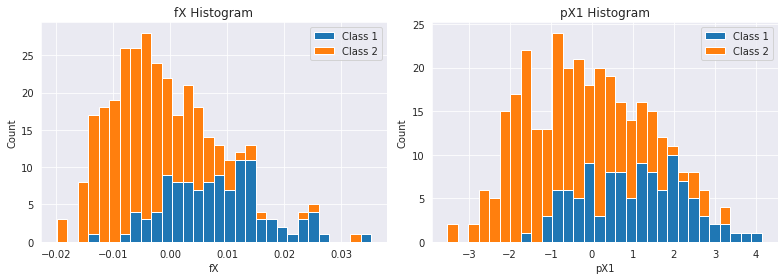

In [15]:
# Located in <project root>/custom_libs/Project3
import custom_libs.Project3.plotter as pl
plotter = pl.Plotter(nx=nX, fx=fX, px1=pX1, px=pX)
plotter.plot_fx_px1_histograms(bins=30)

### Decide what distribution fits the two datasets

In [17]:
from fitter import Fitter
from scipy import stats
distributions = ['gamma', 'lognorm', 'norm', 'rayleigh', 'beta', 'invgauss', 'skewnorm']

#### Test fX

2021-10-16 02:44:47 Project3     INFO     Running D’Agostino and Pearson’s test:
2021-10-16 02:44:47 Project3     INFO     p = 9.164306900152856e-06 < 0.001 ?
2021-10-16 02:44:47 Project3     INFO     Yes. The null hypothesis can be rejected. It can not be Gaussian.




          sumsquare_error        aic         bic  kl_div
beta           289.307733 -85.268296  -22.477277     inf
gamma          307.626065 -87.571736   -7.899594     inf
invgauss       326.970159 -87.545826   12.347073     inf
skewnorm       328.680194 -87.568931   14.078889     inf
lognorm        338.471737 -87.432637   23.824872     inf
rayleigh       406.409427        inf   78.749343     inf
norm           705.625746 -80.931937  261.921677     inf


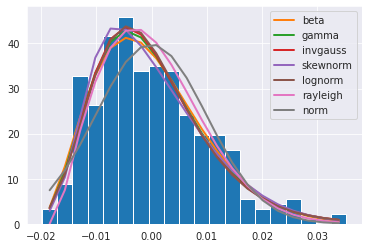

In [18]:
bins = 20
fx_fitter = Fitter(fX[:, :-1], distributions=distributions, bins=bins, 
                       density=False, timeout=60)
fx_fitter.fit()
print(fx_fitter.summary(10, clf=True))
# Run D’Agostino and Pearson’s test 
alpha = 1e-3
k2, p = stats.normaltest(fX[:, :-1])
logger.info("Running D’Agostino and Pearson’s test:")
logger.info(f"p = {p[0]} < {alpha} ?")
if p < alpha:  # null hypothesis: x comes from a normal distribution
    logger.info("Yes. The null hypothesis can be rejected. It can not be Gaussian.")
else:
    logger.info("No. The null hypothesis cannot be rejected. It can be Gaussian.")
logger.nl(2)

In [19]:
# bins = 20
# fx_fitter = Fitter(pX1[:, :-1], distributions=distributions, bins=bins, 
#                    density=False, timeout=60)
# fx_fitter.fit()
# fx_fitter.summary(10, clf=True)
# print(fx_fitter.summary(10, clf=True))
# Run D’Agostino and Pearson’s test 
alpha = 1e-3
k2, p = stats.normaltest(pX1[:, :-1])
logger.info("Running D’Agostino and Pearson’s test:")
logger.info(f"p = {p[0]} < {alpha} ?")
if p < alpha:  # null hypothesis: x comes from a normal distribution
    logger.info("Yes. The null hypothesis can be rejected. It can not be Gaussian.")
else:
    logger.info("No. The null hypothesis cannot be rejected. It can be Gaussian.")
logger.nl(2)

2021-10-16 02:44:48 Project3     INFO     Running D’Agostino and Pearson’s test:
2021-10-16 02:44:48 Project3     INFO     p = 0.0012767349740035417 < 0.001 ?
2021-10-16 02:44:48 Project3     INFO     No. The null hypothesis cannot be rejected. It can be Gaussian.




### Apply Case 3 and kNN on nX, fX, px1, and pX

In [22]:
# Located in <project root>/custom_libs/Project2
import custom_libs.Project2.models as p2_models
statistics = {'knn': {}, 'case3': {}}

#### Apply kNN

In [20]:
k = 12

In [24]:
# kNN for nX
knn = p2_models.KNN(k=k, train=nX_train)
knn.predict(nX)
accuracy, classwise_accuracy, prediction_time = knn.get_statistics()
tp, fn, fp, tn = knn.get_confusion_matrix()
statistics['knn']['nX'] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
knn.print_statistics(name='nX')

2021-10-16 02:53:10 Project2 Models INFO     kNN (k=12) for the nX dataset
2021-10-16 02:53:10 Project2 Models INFO     The overall accuracy is: 0.7801
2021-10-16 02:53:10 Project2 Models INFO     The classwise accuracies are: [0.5779816513761468, 0.8789237668161435]
2021-10-16 02:53:10 Project2 Models INFO     Total time: 0.0108 sec(s)
2021-10-16 02:53:10 Project2 Models INFO     |               |   Positive    |   Negative    |
2021-10-16 02:53:10 Project2 Models INFO     |   Positive    |      63       |      27       |
2021-10-16 02:53:10 Project2 Models INFO     |   Negative    |      46       |      196      |


In [25]:
# kNN for fX
knn = p2_models.KNN(k=k, train=fX_train)
knn.predict(fX)
accuracy, classwise_accuracy, prediction_time = knn.get_statistics()
tp, fn, fp, tn = knn.get_confusion_matrix()
statistics['knn']['fX'] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
knn.print_statistics(name='fX')

2021-10-16 02:53:10 Project2 Models INFO     kNN (k=12) for the fX dataset
2021-10-16 02:53:10 Project2 Models INFO     The overall accuracy is: 0.7801
2021-10-16 02:53:10 Project2 Models INFO     The classwise accuracies are: [0.6422018348623854, 0.8475336322869955]
2021-10-16 02:53:10 Project2 Models INFO     Total time: 0.0073 sec(s)
2021-10-16 02:53:10 Project2 Models INFO     |               |   Positive    |   Negative    |
2021-10-16 02:53:10 Project2 Models INFO     |   Positive    |      70       |      34       |
2021-10-16 02:53:10 Project2 Models INFO     |   Negative    |      39       |      189      |


In [26]:
# kNN for pX1
knn = p2_models.KNN(k=k, train=pX1_train)
knn.predict(pX1)
accuracy, classwise_accuracy, prediction_time = knn.get_statistics()
tp, fn, fp, tn = knn.get_confusion_matrix()
statistics['knn']['pX1'] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
knn.print_statistics(name='pX1')

2021-10-16 02:53:11 Project2 Models INFO     kNN (k=12) for the pX1 dataset
2021-10-16 02:53:11 Project2 Models INFO     The overall accuracy is: 0.7018
2021-10-16 02:53:11 Project2 Models INFO     The classwise accuracies are: [0.4954128440366973, 0.8026905829596412]
2021-10-16 02:53:11 Project2 Models INFO     Total time: 0.0073 sec(s)
2021-10-16 02:53:11 Project2 Models INFO     |               |   Positive    |   Negative    |
2021-10-16 02:53:11 Project2 Models INFO     |   Positive    |      54       |      44       |
2021-10-16 02:53:11 Project2 Models INFO     |   Negative    |      55       |      179      |


In [27]:
# kNN for pX
knn = p2_models.KNN(k=k, train=pX_train)
knn.predict(pX)
accuracy, classwise_accuracy, prediction_time = knn.get_statistics()
tp, fn, fp, tn = knn.get_confusion_matrix()
statistics['knn']['pX'] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
knn.print_statistics(name='pX')

2021-10-16 02:53:11 Project2 Models INFO     kNN (k=12) for the pX dataset
2021-10-16 02:53:11 Project2 Models INFO     The overall accuracy is: 0.7651
2021-10-16 02:53:11 Project2 Models INFO     The classwise accuracies are: [0.5688073394495413, 0.8609865470852018]
2021-10-16 02:53:11 Project2 Models INFO     Total time: 0.0106 sec(s)
2021-10-16 02:53:11 Project2 Models INFO     |               |   Positive    |   Negative    |
2021-10-16 02:53:11 Project2 Models INFO     |   Positive    |      62       |      31       |
2021-10-16 02:53:11 Project2 Models INFO     |   Negative    |      47       |      192      |


#### Apply Case 3 Bayesian

In [28]:
# Located in <project root>/custom_libs/Project1
import custom_libs.Project1.parametric_model as pm
case = "quadratic"
priors = [0.25, 0.75]

In [29]:
# Case 3 for nX
parametric = pm.ParametricModel(train=nX_train, test=nX)
parametric.fit()
parametric.predict(mtype=case, priors=priors)
accuracy, classwise_accuracy, prediction_time = parametric.get_statistics(case)
tp, fn, fp, tn = parametric.get_confusion_matrix(case)
statistics['case3']['nX'] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
parametric.print_statistics(name='nX', mtype=case)

2021-10-16 02:53:20 Project1 Models INFO     Parametric Model (case: quadratic) for the nX dataset
2021-10-16 02:53:20 Project1 Models INFO     The overall accuracy is: 0.7681
2021-10-16 02:53:20 Project1 Models INFO     The classwise accuracies are: [0.5412844036697247, 0.8789237668161435]
2021-10-16 02:53:20 Project1 Models INFO     Total time: 0.0325 sec(s)
2021-10-16 02:53:20 Project1 Models INFO     |               |   Positive    |   Negative    |
2021-10-16 02:53:20 Project1 Models INFO     |   Positive    |      59       |      50       |
2021-10-16 02:53:20 Project1 Models INFO     |   Negative    |      27       |      196      |


In [30]:
# Case 3 for fX
parametric = pm.ParametricModel(train=fX_train, test=fX)
parametric.fit()
parametric.predict(mtype=case, priors=priors)
accuracy, classwise_accuracy, prediction_time = parametric.get_statistics(case)
tp, fn, fp, tn = parametric.get_confusion_matrix(case)
statistics['case3']['fX'] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
parametric.print_statistics(name='fX', mtype=case)

2021-10-16 02:53:21 Project1 Models WARNING  diag requires an array of at least two dimensions
2021-10-16 02:53:21 Project1 Models INFO     Parametric Model (case: quadratic) for the fX dataset
2021-10-16 02:53:21 Project1 Models INFO     The overall accuracy is: 0.8042
2021-10-16 02:53:21 Project1 Models INFO     The classwise accuracies are: [0.5412844036697247, 0.9327354260089686]
2021-10-16 02:53:21 Project1 Models INFO     Total time: 0.0271 sec(s)
2021-10-16 02:53:21 Project1 Models INFO     |               |   Positive    |   Negative    |
2021-10-16 02:53:21 Project1 Models INFO     |   Positive    |      59       |      50       |
2021-10-16 02:53:21 Project1 Models INFO     |   Negative    |      15       |      208      |


In [31]:
# Case 3 for pX1
parametric = pm.ParametricModel(train=pX1_train, test=pX1)
parametric.fit()
parametric.predict(mtype=case, priors=priors)
accuracy, classwise_accuracy, prediction_time = parametric.get_statistics(case)
tp, fn, fp, tn = parametric.get_confusion_matrix(case)
statistics['case3']['pX1'] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
parametric.print_statistics(name='pX1', mtype=case)

2021-10-16 02:53:21 Project1 Models WARNING  diag requires an array of at least two dimensions
2021-10-16 02:53:21 Project1 Models INFO     Parametric Model (case: quadratic) for the pX1 dataset
2021-10-16 02:53:21 Project1 Models INFO     The overall accuracy is: 0.7319
2021-10-16 02:53:21 Project1 Models INFO     The classwise accuracies are: [0.3486238532110092, 0.9192825112107623]
2021-10-16 02:53:21 Project1 Models INFO     Total time: 0.0267 sec(s)
2021-10-16 02:53:21 Project1 Models INFO     |               |   Positive    |   Negative    |
2021-10-16 02:53:21 Project1 Models INFO     |   Positive    |      38       |      71       |
2021-10-16 02:53:21 Project1 Models INFO     |   Negative    |      18       |      205      |


In [32]:
# Case 3 for pX
parametric = pm.ParametricModel(train=pX_train, test=pX)
parametric.fit()
parametric.predict(mtype=case, priors=priors)
accuracy, classwise_accuracy, prediction_time = parametric.get_statistics(case)
tp, fn, fp, tn = parametric.get_confusion_matrix(case)
statistics['case3']['pX'] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
parametric.print_statistics(name='pX', mtype=case)

2021-10-16 02:53:21 Project1 Models INFO     Parametric Model (case: quadratic) for the pX dataset
2021-10-16 02:53:21 Project1 Models INFO     The overall accuracy is: 0.7741
2021-10-16 02:53:21 Project1 Models INFO     The classwise accuracies are: [0.5779816513761468, 0.8699551569506726]
2021-10-16 02:53:21 Project1 Models INFO     Total time: 0.0481 sec(s)
2021-10-16 02:53:21 Project1 Models INFO     |               |   Positive    |   Negative    |
2021-10-16 02:53:21 Project1 Models INFO     |   Positive    |      63       |      46       |
2021-10-16 02:53:21 Project1 Models INFO     |   Negative    |      29       |      194      |


### Plot ROC Curves for pX using Case 3

In [33]:
# Case 3 for pX for different priors
step = 0.001
prior_c1_lst = np.arange(0.0+step, 1.0+step, step)
confusion_matrix_data = []
for prior_c1 in prior_c1_lst:
    priors = (prior_c1, abs(1-prior_c1))
    parametric = pm.ParametricModel(train=pX_train, test=pX)
    parametric.fit()
    parametric.predict(mtype=case, priors=priors)
    tp, fn, fp, tn = parametric.get_confusion_matrix(case)
    # Calculate True Positive Rate and False Positive Rate
    try:
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
    except Exception as e:
        print(priors)
        print(tp, fn, fp, tn)
        raise e
    confusion_matrix_data.append({'priors': priors, 'tpr': tpr, 'fpr': fpr})

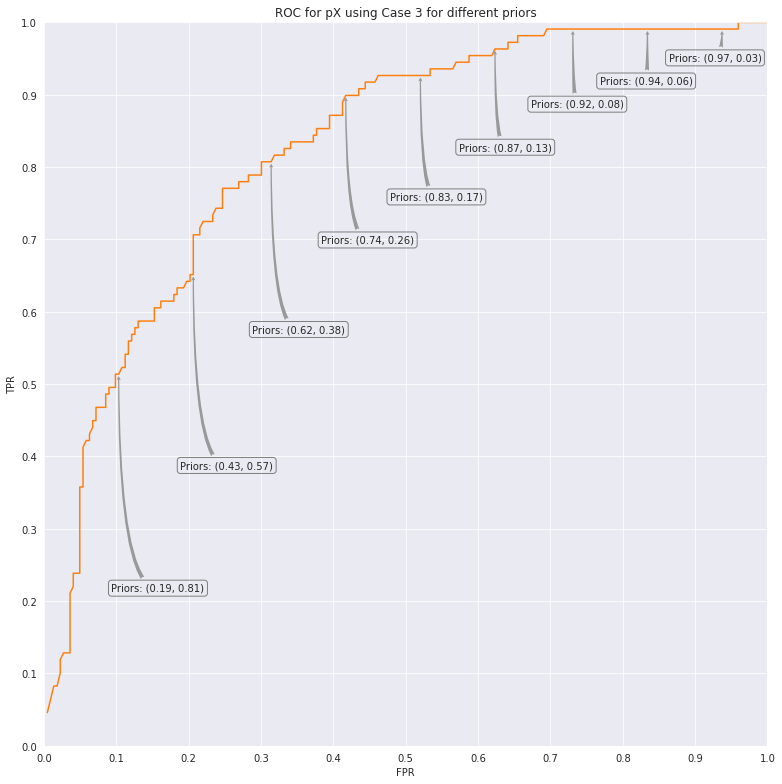

In [34]:
# Plot the ROC
# Located in <project root>/custom_libs/Project3
import custom_libs.Project3.plotter as pl
plotter = pl.Plotter(nx=nX, fx=fX, px1=pX1, px=pX)
plotter.plot_roc(confusion_matrix_data=confusion_matrix_data)

## Task 2

In [37]:
# Located in <project root>/custom_libs/Project2
import custom_libs.Project2.models as p2_models
k_range = (32, 64, 128, 256)
# Our dataset
logger.info(f"Flowers dataset shape (BGR mode): {flowers.shape}")
# 120x120 pixels x 3 channels (BGR)

2021-10-16 03:11:04 Project3     INFO     Flowers dataset shape (BGR mode): (120, 120, 3)


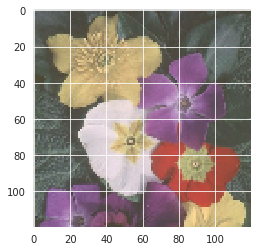

In [38]:
# Show image
import cv2
flowers_rgb = cv2.cvtColor(flowers, cv2.COLOR_BGR2RGB)
plt.imshow(flowers_rgb, interpolation='nearest')
plt.show()

In [39]:
# Reshape image
shape_orig = flowers.shape
flatten_shape = (shape_orig[0]*shape_orig[1], shape_orig[2])
flowers_flat = flowers.reshape(*flatten_shape)
logger.info(f"Flowers Flatten: {flowers_flat.shape}")

2021-10-16 03:11:05 Project3     INFO     Flowers Flatten: (14400, 3)


### KMeans Compression

In [40]:
# Kmeans for the flower dataset
seed = 42
kmeans_results = []
for k in k_range:
    kmeans = p2_models.Kmeans(train_data=flowers_flat, k=k, x_y_split=False, seed=seed)
    kmeans.fit()
    _ = kmeans.predict(test_data=flowers_flat, x_y_split=False,
                   dist='norm', max_iter=200, fix_mismatch=False)
    compressed = kmeans.get_compressed()
    rmse = kmeans.get_rmse(reconstructed=compressed, original=flowers_flat)
    kmeans_results.append({'k': k, 'compressed': compressed, 'rmse': rmse})

2021-10-16 03:11:06 Project2 Models INFO     Epoch 50: Changes=249
2021-10-16 03:11:07 Project2 Models INFO     Epoch 50: Changes=690
2021-10-16 03:11:08 Project2 Models INFO     Epoch 100: Changes=199
2021-10-16 03:11:08 Project2 Models INFO     Epoch 150: Changes=598
2021-10-16 03:11:09 Project2 Models INFO     Epoch 200: Changes=261
2021-10-16 03:11:11 Project2 Models INFO     Epoch 50: Changes=1162
2021-10-16 03:11:12 Project2 Models INFO     Epoch 100: Changes=825
2021-10-16 03:11:14 Project2 Models INFO     Epoch 150: Changes=499
2021-10-16 03:11:16 Project2 Models INFO     Epoch 200: Changes=447


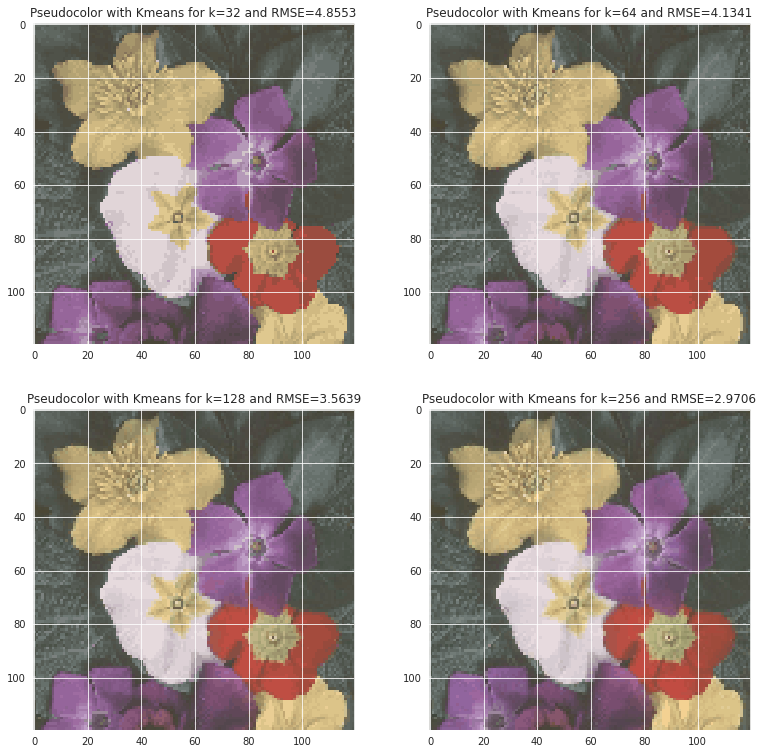

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(13, 13))
for result, ax in zip(kmeans_results, list(axes[0])+list(axes[1])):
    k = result['k']
    rmse = result['rmse']
    compressed = result['compressed'].reshape(shape_orig[0], shape_orig[1], -1)
    compressed_rgb = cv2.cvtColor(compressed, cv2.COLOR_BGR2RGB)
    ax.imshow(compressed_rgb, interpolation='nearest')
    ax.set_title(f'Pseudocolor with Kmeans for k={k} and RMSE={rmse:.4f}')

### WTA Compression

In [42]:
# WTA for the flower dataset
seed = 42
epsilon = 0.1
wta_results = []
for k in k_range:
    wta = p2_models.WTA(train_data=flowers_flat, k=k, x_y_split=False, seed=seed)
    wta.fit()
    _ = wta.predict(test_data=flowers_flat, epsilon=epsilon, 
                    x_y_split=False, max_iter=200, fix_mismatch=False)
    compressed = wta.get_compressed()
    rmse = wta.get_rmse(reconstructed=compressed, original=flowers_flat)
    wta_results.append({'k': k, 'compressed': compressed, 'rmse': rmse})

2021-10-16 03:11:19 Project2 Models INFO     Epoch 50: Changes=46
2021-10-16 03:11:21 Project2 Models INFO     Epoch 100: Changes=21
2021-10-16 03:11:23 Project2 Models INFO     Epoch 150: Changes=9
2021-10-16 03:11:25 Project2 Models INFO     Epoch 200: Changes=9
2021-10-16 03:11:31 Project2 Models INFO     Epoch 50: Changes=38
2021-10-16 03:11:36 Project2 Models INFO     Epoch 100: Changes=45
2021-10-16 03:11:42 Project2 Models INFO     Epoch 150: Changes=44
2021-10-16 03:11:48 Project2 Models INFO     Epoch 200: Changes=10
2021-10-16 03:12:06 Project2 Models INFO     Epoch 50: Changes=47
2021-10-16 03:12:24 Project2 Models INFO     Epoch 100: Changes=10
2021-10-16 03:12:42 Project2 Models INFO     Epoch 150: Changes=10
2021-10-16 03:13:01 Project2 Models INFO     Epoch 200: Changes=11
2021-10-16 03:14:01 Project2 Models INFO     Epoch 50: Changes=53
2021-10-16 03:15:02 Project2 Models INFO     Epoch 100: Changes=25
2021-10-16 03:16:03 Project2 Models INFO     Epoch 150: Changes=11
2

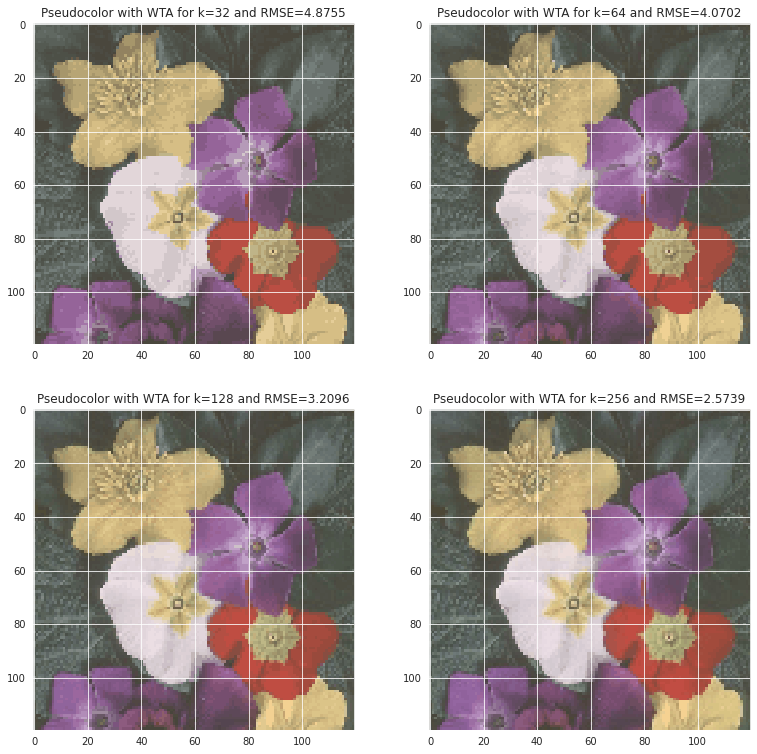

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(13, 13))
for result, ax in zip(wta_results, list(axes[0])+list(axes[1])):
    k = result['k']
    rmse = result['rmse']
    compressed = result['compressed'].reshape(shape_orig[0], shape_orig[1], -1)
    compressed_rgb = cv2.cvtColor(compressed, cv2.COLOR_BGR2RGB)
    ax.imshow(compressed_rgb, interpolation='nearest')
    ax.set_title(f'Pseudocolor with WTA for k={k} and RMSE={rmse:.4f}')